ic| break_even_point_months: 15
    san_capital_cost: 260000
    san_monthly_cost: 6166
    aws_cost_per_month: 23000


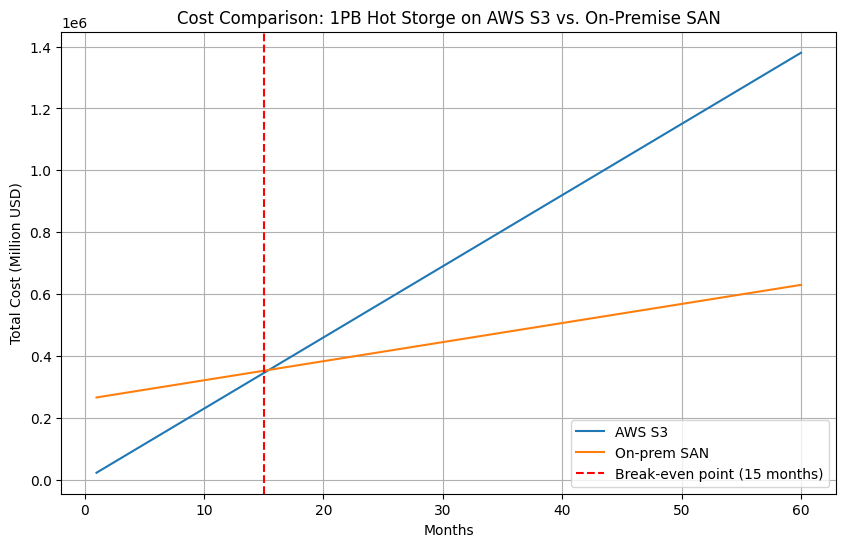

In [5]:
!pip install icecream
import matplotlib.pyplot as plt
from icecream import ic

# Constants
aws_storage_cost_per_gb_per_month = 0.023  # AWS S3 Standard cost per GB per month in USD (50-100 milliseconds read speed)
dataset_size_gb = 1_000_000  # 1 Petabyte in GB

# On-premise SAN costs (detailed breakdown)
# 1. HDD Costs
hdd_capacity_tb = 10  # Each HDD capacity in TB
usable_storage_fraction = 0.8  # Fraction of storage usable after RAID and spares
num_hdds = int(dataset_size_gb / (hdd_capacity_tb * 1_000 * usable_storage_fraction))  # Total number of HDDs required
hdd_cost_per_unit = 400  # Cost per 10 TB HDD in USD
total_hdd_cost = num_hdds * hdd_cost_per_unit

# 2. SAN Enclosure/Chassis
chassis_cost = 90_000  # Cost for SAN enclosure to house HDDs

# 3. SAN Controller
controller_cost = 50_000  # Cost for SAN controllers

# 4. Networking
networking_cost = 20_000  # Cost for switches and cabling

# 5. Power Supply Units (PSUs)
psu_cost = 10_000  # Cost for redundant power supplies

# 6. Software Licensing
software_licensing_cost = 30_000  # SAN management software licensing

# 7. Installation and Initial Setup
installation_cost = 10_000  # Professional setup costs

# Total SAN capital cost
san_capital_cost = (total_hdd_cost + chassis_cost + controller_cost +
                    networking_cost + psu_cost + software_licensing_cost +
                    installation_cost)

# SAN operational costs
san_maintenance_cost_per_year = 50_000  # Yearly maintenance cost in USD
san_power_and_cooling_per_month = 2_000  # Monthly power and cooling cost in USD
san_monthly_cost = int(san_power_and_cooling_per_month + (san_maintenance_cost_per_year / 12))

# AWS costs
aws_cost_per_month = int(dataset_size_gb * aws_storage_cost_per_gb_per_month)

# Calculate break-even point and costs over time
months = 0
total_aws_cost = 0
total_san_cost = san_capital_cost
aws_costs = []
san_costs = []
month_list = []

while months < 60: # Simulate costs for 5 years
    months += 1
    total_aws_cost += aws_cost_per_month
    total_san_cost += san_monthly_cost
    aws_costs.append(total_aws_cost)
    san_costs.append(total_san_cost)
    month_list.append(months)

break_even_point_months = next((i for i, cost in enumerate(aws_costs) if cost >= san_costs[i]), None)

_=ic(break_even_point_months,san_capital_cost,san_monthly_cost,aws_cost_per_month)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(month_list, aws_costs, label='AWS S3')
plt.plot(month_list, san_costs, label='On-prem SAN')
plt.axvline(x=break_even_point_months, color='r', linestyle='--', label=f'Break-even point ({break_even_point_months} months)')
plt.xlabel('Months')
plt.ylabel('Total Cost (Million USD)')
plt.title('Cost Comparison: 1PB Hot Storge on AWS S3 vs. On-Premise SAN')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
san_capital_cost

260000